In [22]:
from mmpretrain import ImageClassificationInferencer
import argparse
from pathlib import Path
import numpy as np

In [6]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
scene = 'playground'
inferencer = ImageClassificationInferencer(
    model='../configs/larp/efficientnet-b4_8xb32-01norm_in1k.py',
    pretrained='../models/{}_0415.pth'.format(scene),
    # device=args.device
)

Loads checkpoint by local backend from path: ../models/playground_0415.pth


In [13]:
test_dir = '/root/autodl-tmp/test2017/'
test_imgs = list(map(str,Path(test_dir).glob('*.jpg')))

In [14]:
len(test_imgs)

40670

In [15]:
img = cv2.imread(test_imgs[0])

In [17]:
pred = inferencer(test_imgs, batch_size=16)

Output()

In [19]:
pos = [ d['pred_scores'][1] for d in pred]

In [30]:
(np.array(pos)>0.9).mean()

0.00865502827637079

In [32]:
pred[0]

{'pred_scores': array([9.999999e-01, 7.637128e-08], dtype=float32),
 'pred_label': 0,
 'pred_score': 0.9999998807907104,
 'pred_class': 'negative'}

In [33]:
false_positives = []
for mistake, p in zip(test_imgs, pred):
    if p['pred_scores'][1] > 0.9:
        false_positives.append(mistake)

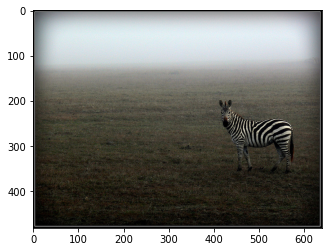

In [44]:
plt.imshow(cv2.imread(false_positives[8])[:,:,::-1])

In [45]:
scene = 'reverse2'
inferencer = ImageClassificationInferencer(
    model='../configs/larp/efficientnet-b4_8xb32-01norm_in1k.py',
    pretrained='../models/{}_0415.pth'.format(scene),
    # device=args.device
)
pred_r2 = inferencer(test_imgs, batch_size=32)
pos_r2 = [ d['pred_scores'][1] for d in pred_r2]
print((np.array(pos_r2)>0.9).mean())

Loads checkpoint by local backend from path: ../models/reverse2_0415.pth


Output()

0.03941480206540447


In [46]:
scene = 'doorplate'
inferencer = ImageClassificationInferencer(
    model='../configs/larp/efficientnet-b4_8xb32-01norm_in1k.py',
    pretrained='../models/{}_0415.pth'.format(scene),
    # device=args.device
)
pred_door = inferencer(test_imgs, batch_size=32)
pos_door = [ d['pred_scores'][1] for d in pred_door]
print((np.array(pos_door)>0.9).mean())

Loads checkpoint by local backend from path: ../models/doorplate_0415.pth


Output()

0.0028276370789279567


TypeError: vars() argument must have __dict__ attribute